OK, in this notebook we are going to read in the data, match it, and pull the images

In [1]:
import astropy.io.ascii as ascii
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import astropy.visualization as viz
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import astropy.wcs as WCS # you need this astropy module for processing fits files
import matplotlib as mpl
import numpy as np
import tqdm
from astropy.table import Table, join
%matplotlib inline

Read in the CSV file of all the Galaxy Zoo data

In [2]:
filename = 'galaxyzoo2--assets--14-07-2017.csv'
path = '/Users/jegpeek/Dropbox/xorastro/'
data = ascii.read(path + filename, format='csv', fast_reader=False)

And then read in the meta data with color information from CASJobs

In [3]:
metadata = Table.read(path + "xorastro_metadata_dr7id.fits")

To do the crossmatch, we need to rename the 'name' key to 'dr7objid'

In [4]:
data.rename_column('name', 'dr7objid')

and then join them using astropy Table inner join:

In [5]:
joined = join(data, metadata, keys=['dr7objid'])

and then let's make sure things don't look crazy in RA and dec...

(array([    530.,    1145.,    2860.,    9434.,   93979.,  112457.,
          13176.,    5489.,    3262.,    1984.]),
 array([ -1.00000000e-04,  -8.00000000e-05,  -6.00000000e-05,
         -4.00000000e-05,  -2.00000000e-05,   0.00000000e+00,
          2.00000000e-05,   4.00000000e-05,   6.00000000e-05,
          8.00000000e-05,   1.00000000e-04]),
 <a list of 10 Patch objects>)

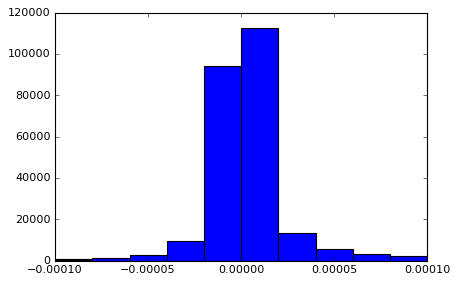

In [17]:
plt.hist(joined['ra_1']-joined['ra_2'], range=[-0.0001, 0.0001])

(array([   8855.,   13564.,    8180.,    7051.,  103486.,   97302.,
           4472.,     610.,     222.,     104.]),
 array([ -1.00000000e-04,  -8.00000000e-05,  -6.00000000e-05,
         -4.00000000e-05,  -2.00000000e-05,   0.00000000e+00,
          2.00000000e-05,   4.00000000e-05,   6.00000000e-05,
          8.00000000e-05,   1.00000000e-04]),
 <a list of 10 Patch objects>)

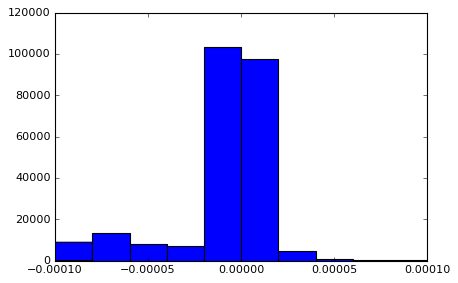

In [19]:
plt.hist(joined['dec_1']-joined['dec_2'], range=[-0.0001, 0.0001])

Looks good! subarcsecond matching is fine by us.

In [24]:
imgcube = np.zeros([424, 424, len(joined)])
for i, d in enumerate(joined[0:10]):
    response = requests.get(d['location'])
    img = Image.open(BytesIO(response.content))
    red, green, blue = img.split()
    imgcube[:, :, i] = green # confusingly green is SDSS r band

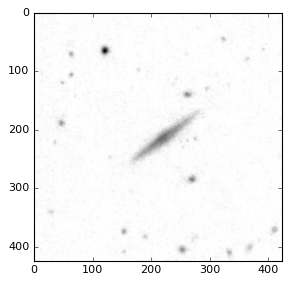

In [23]:
plt.imshow(imgcube[:, :, 0], cmap='Greys')
plt.show()

In [ ]:
np.save('imgcube.npy', imgcube)